<H1 style="text-align: left">Corner Detection</H1>

In [1]:
import urllib
import matplotlib, cv2
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams['figure.dpi'] = 72
print('OpenCV version: {}'.format(cv2.__version__))

OpenCV version: 4.7.0


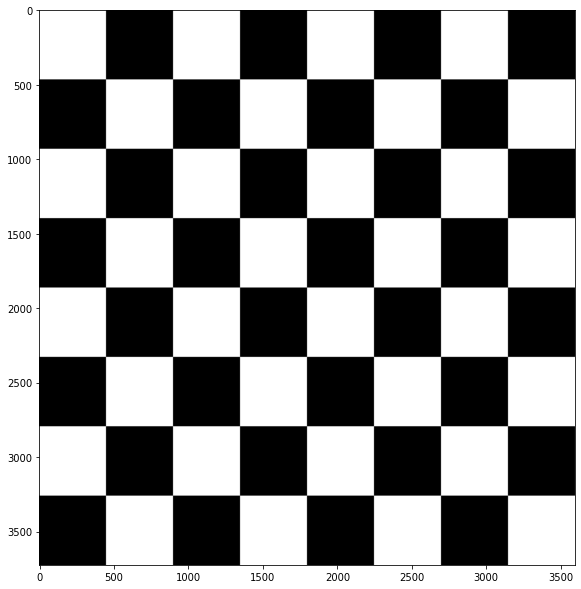

In [3]:
# read an image
img = cv2.imread('/Users/sakethmaddineni/Downloads/files-for-week-02/chessboard.png')

# convert image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY).astype(np.float32)

# show the image
plt.imshow(gray_img, cmap='gray')

Adding boarder to all the detected corners

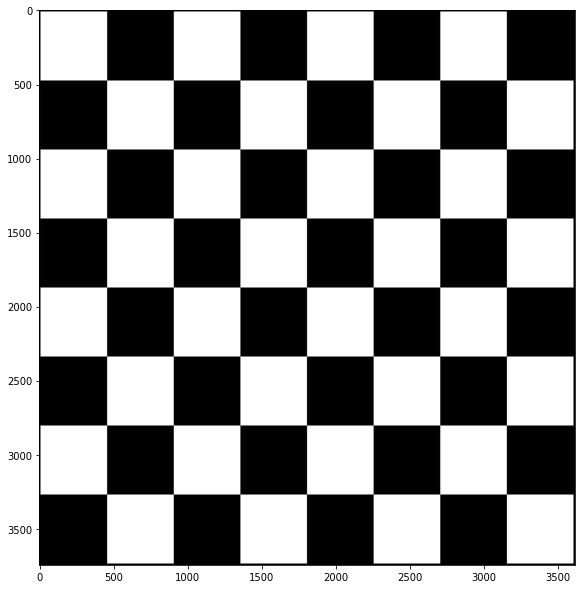

In [11]:
g_img=cv2.copyMakeBorder(gray_img.copy(),10,10,10,10,cv2.BORDER_CONSTANT, value=[0,0,0])
plt.imshow(g_img, cmap='gray')

In [20]:
# construct the Sobel x-axis kernel
sobelX = np.array(([-1, 0, 1], [-2, 0, 2], [-1, 0, 1]), dtype=np.float64)
# construct the Sobel y-axis kernel
sobelY = np.array(([-1, -2, -1], [0, 0, 0], [1, 2, 1]), dtype=np.float64)

I_x = cv2.filter2D(g_img, -1, sobelX)
I_y = cv2.filter2D(g_img, -1, sobelY)

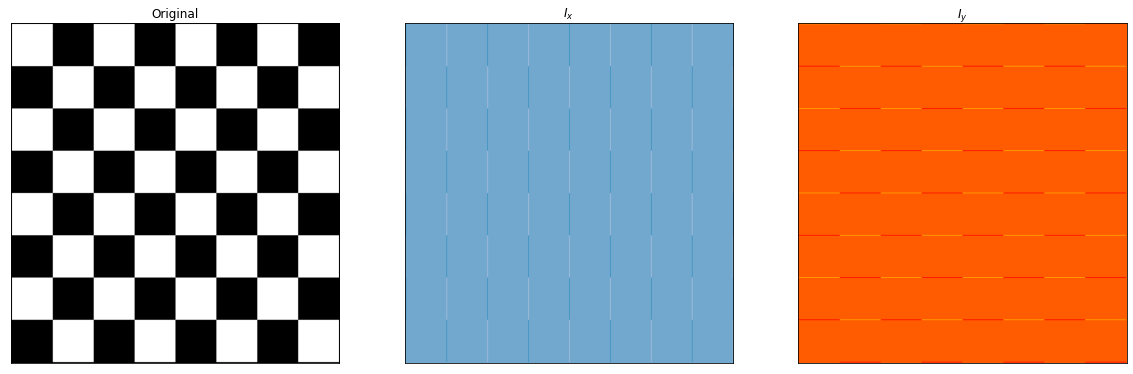

In [22]:
# plot
plt.subplot(1,3,1),plt.imshow(g_img, cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(I_x, cmap = 'PuBu')
plt.title('$I_x$'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(I_y, cmap = 'hot')
plt.title('$I_y$'), plt.xticks([]), plt.yticks([])
plt.show()

Smoothing the images to remove harsh responses

In [19]:
# Gradient covariance and light smoothing
I_x_I_x = cv2.GaussianBlur(I_x*I_x, (3, 3), sigmaX=1, sigmaY=1)
I_y_I_y = cv2.GaussianBlur(I_y*I_y, (3, 3), sigmaX=1, sigmaY=1)
I_x_I_y = cv2.GaussianBlur(I_x*I_y, (3, 3), sigmaX=1, sigmaY=1)

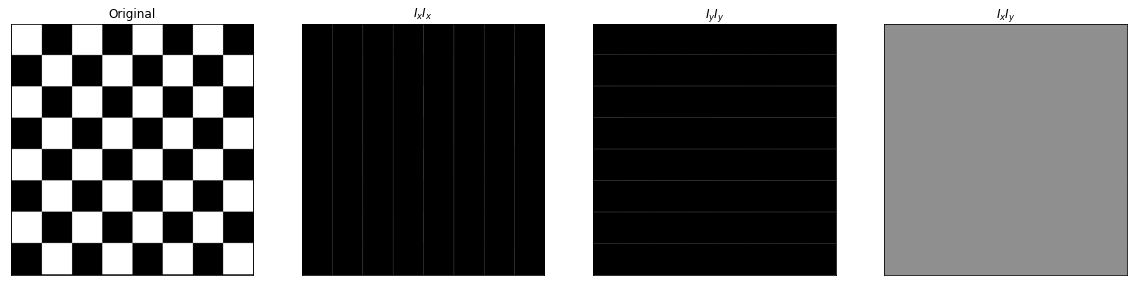

In [23]:
# plot
plt.subplot(1,4,1),plt.imshow(g_img, cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,4,2),plt.imshow(I_x_I_x, cmap = 'gray')
plt.title('$I_xI_x$'), plt.xticks([]), plt.yticks([])
plt.subplot(1,4,3),plt.imshow(I_y_I_y, cmap = 'gray')
plt.title('$I_yI_y$'), plt.xticks([]), plt.yticks([])
plt.subplot(1,4,4),plt.imshow(I_x_I_y, cmap = 'gray')
plt.title('$I_xI_y$'), plt.xticks([]), plt.yticks([])
plt.show()

Score to see if a window can have corner
$$R = \text{det}(M) - k(\text{trace}(M))^2$$

where
* $\text{det}(M) = \lambda_1 \lambda_2$
* $\text{trace}(M) = \lambda_1 + \lambda_2$
* $\lambda_1$ and $\lambda_2$ are the eigenvalues of $M$

In [24]:
k = 0.05
# determinant
detA = I_x_I_x * I_y_I_y - I_x_I_y ** 2
# trace
traceA = I_x_I_x + I_y_I_y
R = detA - k * traceA ** 2
print(f'max of R is {R.max()}')

max of R is 80146726912.0


In [26]:
R.shape

(3723, 3595)

R>0 is a corner

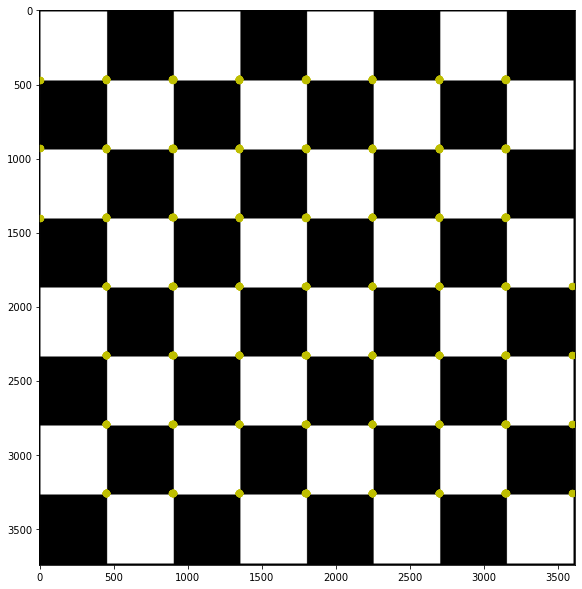

In [31]:
y, x = np.where(R > 0)
plt.figure()
plt.imshow(g_img, cmap='gray')
plt.scatter(x, y, c='y', s=40)
plt.show()

R<0 edges

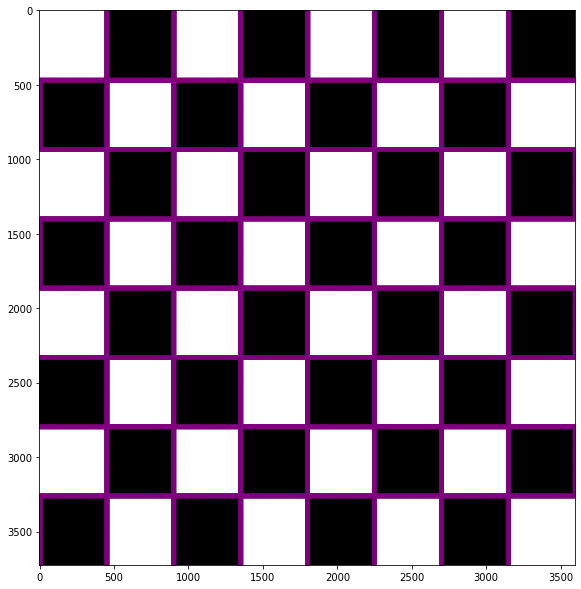

In [35]:
y, x = np.where(R < 0)
plt.figure()
plt.imshow(gray_img, cmap='gray')
plt.scatter(x, y, c='purple', s=5)
plt.show()

R=0 flat region

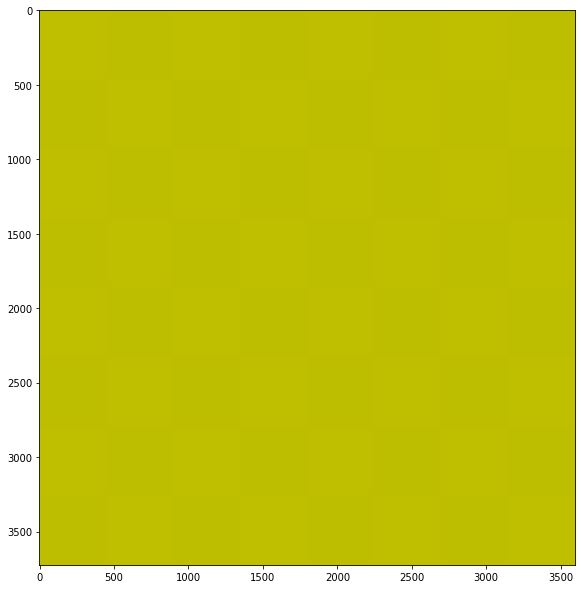

In [37]:
y, x = np.where(R == 0)
plt.figure()
plt.imshow(gray_img, cmap='gray')
plt.scatter(x, y, c='y', s=0.5)
plt.show()